<a href="https://colab.research.google.com/github/Magaton1010/image-analysis/blob/main/Pillow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import PIL
PIL.__version__


'9.4.0'

In [ ]:
help(PIL)


Running help() on Image tells us that this object is "the Image class wrapper". We see from the top level documentation about the image object that there is "hardly ever any reason to call the Image constructor directly", and they suggest that the open function might be the way to go.

In [ ]:
from PIL import Image
help(Image)
help(Image.open)

upload the file to the colab

In [16]:

from google.colab import files
uploaded_file=files.upload()



Saving test1.tif to test1 (2).tif


In [17]:
import io
file_name= list(uploaded_file.keys())[0]


In [18]:
print(str(file_name))

test1 (2).tif


In [20]:
image =Image.open(io.BytesIO(uploaded_file[file_name]))
print(image)

<PIL.TiffImagePlugin.TiffImageFile image mode=RGB size=800x450 at 0x7995C9BA8520>


we can use the python inspect module to see as the getmro function will return alis of all of the classes that are beging inherited by a given object

In [21]:
import inspect
print("The type of the image is " + str(type(image)))
inspect.getmro(type(image))

The type of the image is <class 'PIL.TiffImagePlugin.TiffImageFile'>


(PIL.TiffImagePlugin.TiffImageFile,
 PIL.ImageFile.ImageFile,
 PIL.Image.Image,
 object)

In [47]:
image.show()

if the obeject is store remotly on the server,but **'image.show'** tries to show it localy. So we need to render the image in the Jupyter notebook.
Making a progress in this way,the Jupyter environment is running a special wrapper around the Python interpretor, called IPython. IPython allows the kernel back end to communicate with a browser front end, among other things. The IPython package has a display function which can take objects and use custom formatters in order to render them. A number of formatters are provided by default, including one which knows how to handle image types.

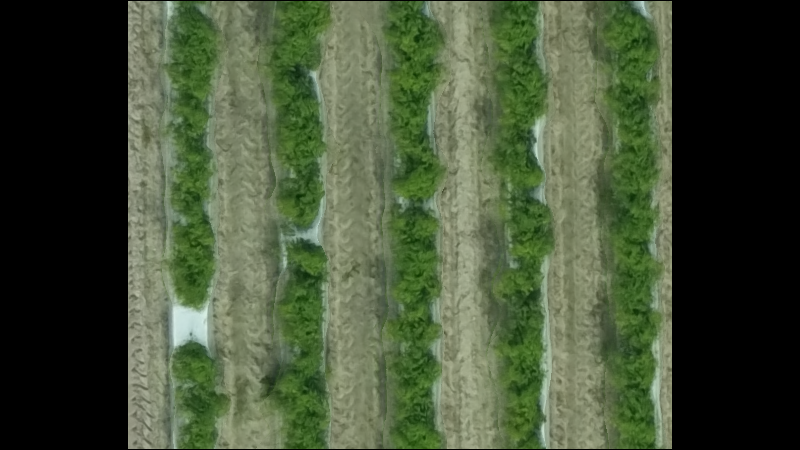

In [23]:
from IPython.display import display
display(image)

In [27]:
# First, lets import the PIL library and the Image object
import PIL
from PIL import Image
# And lets import the display functionality
from IPython.display import display
# And finally, lets load the image we were working with it
file= list(uploaded_file.keys())[0]
image=Image.open(file)

In [28]:
# The save method has a couple of parameters which are interesting. The first, called fp, is the filename
# we want to save the object too. The second, format, is interesting, it allows us to change the type of
# the image, but the docs tell us that this should be done automatically by looking at the file extension
# as well. Lets give it a try -- this file was originally a GifImageFile, but I bet if we save it with a
# .png format and read it in again we'll get a different kind of file
image.save("msi_recruitment.png")
image=Image.open("msi_recruitment.png")
import inspect
inspect.getmro(type(image))

(PIL.PngImagePlugin.PngImageFile,
 PIL.ImageFile.ImageFile,
 PIL.Image.Image,
 object)

In [29]:
# Indeed, this created a new file, which we could view by going to the Jupyter notebook file list by clicking
# on the logo at the top of the browser, and we can see this new object is actually a PngImageFile object
# For the purposes of this class the difference in image formats isn't so important, but it's nice that you can
# explore how a library works using the functions of help(), dir() and getmro().
#
# The PILLOW library also has some nice image filters to add some effects. It does this through the filter()
# function. The filter() function takes a Filter object, and those are all stored in the ImageFilter object.
# Lets take a look.
from PIL import ImageFilter

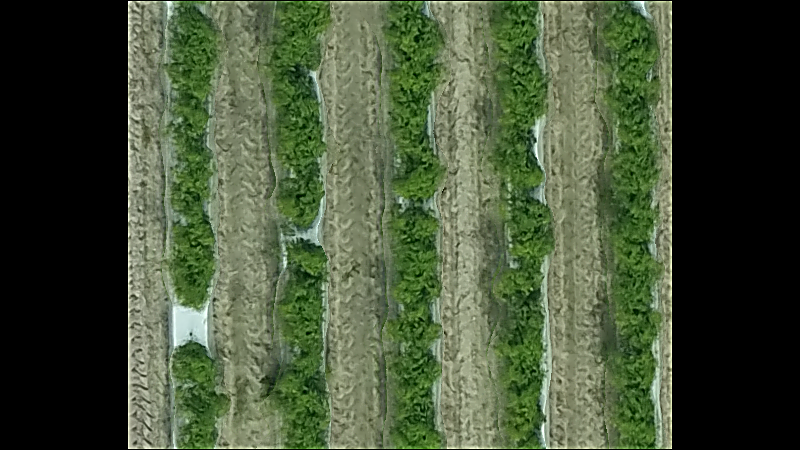

In [30]:
# There are a bunch of different filters here, but lets just try and apply the BLUR filter. Before we do this
# we have to convert the image to RGB mode. This is a bit magical -- images like gifs are limited in how many
# colors can be displayed at once based on the size of the pallet. This is similar to a painters pallet, which
# only has so much room. This is actually a very old image file format. If we convert the image into something
# more sophisticated we can apply these interesting image transforms. Sometimes learning a new library means
# digging a bit deeper into the domain the library is about. We can convert the image using the convert()
# function.
image=image.convert('RGB') # this stands for red, green blue mode
blurred_image=image.filter(PIL.ImageFilter.UnsharpMask)
display(blurred_image)

In [31]:
# Ok, let me show you one more function in the lecture, which is crop(). This removes portions of the image
# except for the bounding box you describe. When you think of images, think of individual dots or pixels
# which make up that image being lined up in a grid. You can actually see the number of pixels high the image
# is and the width of the image
print("{}x{}".format(image.width, image.height))

800x450


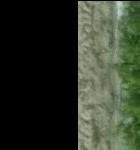

In [32]:
# With PIL images, we define the bounding box using the upper left corner and the lower right corner. And
# we count the number of pixels out from the upper left corner, which is 0,0. This might seem odd if you're
# used to coordinate systems where you start in the lower left -- just remember that we define our box in the
# same way we count out positions in the image.
#
# So, if we wanted to get the Michigan logo out of this image, we might start with the left at, say 50 pixels,
# and the top at 0 pixels, then we might walk to the right another 190 pixels, and set the lower bound to say
# 150 pixels
display(image.crop((50,0,190,150)))

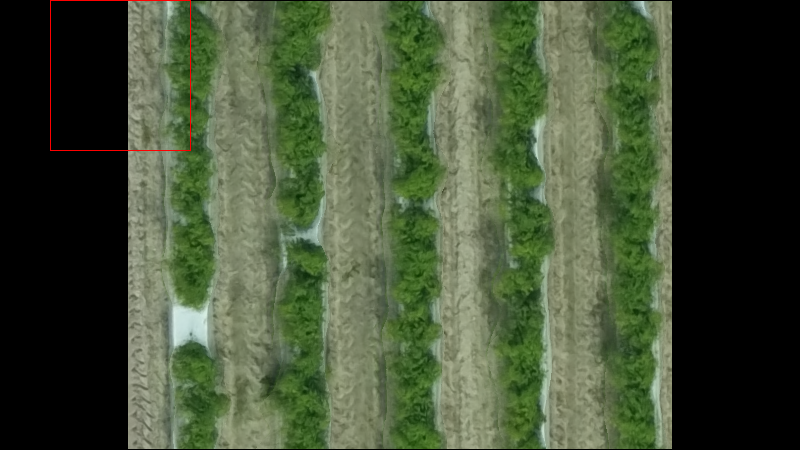

In [33]:
# Of course crop(), like other functions, only returns a copy of the image, and doesn't change the image itself.
# A strategy I like to do is try and draw the bounding box directly on the image, when I'm trying to line things
# up. We can draw on images using the ImageDraw object. I'm not going to go into this in detail, but here's a
# quick example of how. I might draw the bounding box in this case.
from PIL import ImageDraw
drawing_object=ImageDraw.Draw(image)
drawing_object.rectangle((50,0,190,150), fill = None, outline ='red')
display(image)

In [39]:
import PIL
from PIL import Image
from IPython.display import display
import io
f= list(uploaded_file.keys())[0]
img= Image.open(f).convert('RGB')

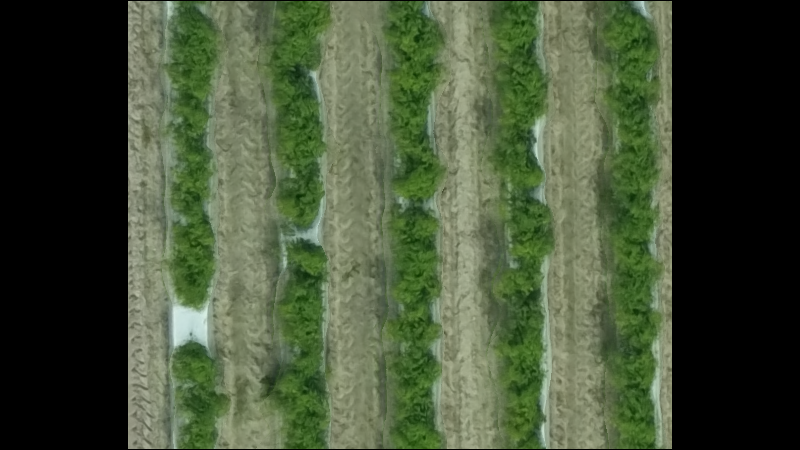

In [40]:
display(img)

In [53]:
# A task that is fairly common in image and picture manipulation is to create contact sheets of images.
# A contact sheet is one image that actually contains several other different images. Lets try and make
# a contact sheet for the Master of Science in Information advertisment image. In particular, lets change
# the brightness of the image in ten different ways, then scale the image down smaller, and put them side
# by side so we can get the sense of which brightness we might want to use.
#
# First up, lets import the ImageEnhance module, which has a nice object called Brightness
from PIL import ImageEnhance
# Checking the online documentation for this function, it takes a value between 0.0 (a completely black
# image) and 1.0 (the original image) to adjust the brightness. All of the classes in the ImageEnhance module
# do this the same way, you create an object, in this case Brightness, then you call the enhance function()
# on that object with an appropriate parameter.
#
# Lets write a little loop to generate ten images of different brightness. First we need the Brightness
# object with our image
enhancer=ImageEnhance.Brightness(img)
images=[]
for i in range(0, 10):
    # We'll divide i by ten to get the decimal value we want, and append it to the images list
    # we actually call the brightness routine by calling the enhance() function. Remember, you can dig into
    # details of this using the help() function, or by consulting web docs
    images.append(enhancer.enhance(i/10))
# We can see the result here is a list of ten PIL.Image.Image objects. Jupyter nicely prints out the value
# of python objects nested in lists
print(images)

[<PIL.Image.Image image mode=RGB size=800x450 at 0x7995E6407760>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7995E6405E10>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7995E64048E0>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7995E64041C0>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7995E6404730>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7995E6405090>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7995E64078E0>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7995E6407880>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7995E6406320>, <PIL.Image.Image image mode=RGB size=800x450 at 0x7995E64070A0>]


In [54]:
# Lets take these images now and composite them, one above another, in a contact sheet.
# There are several different approaches we can use, but I'll simply create a new image which is like
# the first image, but ten times as high. Lets check out the PIL.Image.new functionality
help(PIL.Image.new)


Help on function new in module PIL.Image:

new(mode, size, color=0)
    Creates a new image with the given mode and size.
    
    :param mode: The mode to use for the new image. See:
       :ref:`concept-modes`.
    :param size: A 2-tuple, containing (width, height) in pixels.
    :param color: What color to use for the image.  Default is black.
       If given, this should be a single integer or floating point value
       for single-band modes, and a tuple for multi-band modes (one value
       per band).  When creating RGB images, you can also use color
       strings as supported by the ImageColor module.  If the color is
       None, the image is not initialised.
    :returns: An :py:class:`~PIL.Image.Image` object.



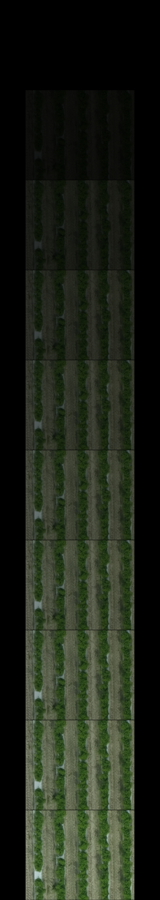

In [55]:
# The new function requires that we pass it a mode. We're going to use the mode 'RGB' which stands for
# Red, Green, and Blue, and is the mode of our current first image. There are lots of different image mode
# formats, and this one is most common.
# For the size we have a tuple, which is the width of the image and the height. We'll use the width of our
# current first image, but for the height we'll multiple this by ten. This will make a sort of "canvas" for
# our contact sheet. Finally, the color is optional, and we'll just leave it at black.
first_image=images[0]
from PIL import Image
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width,10*first_image.height))

# So now we have a black image that's ten times the size of the other images in the contact_sheet
# variable. Now lets just loop through the image list and paste() the results in. The paste() function
# will be called on the contact_sheet object, and takes in a new image to paste, as well as an (x,y)
# offset for that image. In our case, the x position is always 0, but the y location will change by
# 450 pixels each time we iterate through the loop.
#
# Lets first create a counter variable for the y location. It will start at zero
current_location = 0
for img in images:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (0, current_location) )
    # And update the current_location counter
    current_location=current_location+450

# This contact sheet has gotten big: 4,500 pixels tall! Lets just resize this sheet for display. We can do
# this using the resize() function. This function just takes a tuple of width and height, and we'll resize
# everything down to the size of just two individual images
contact_sheet = contact_sheet.resize((160,900) )
# Now lets just display that composite image
display(contact_sheet)

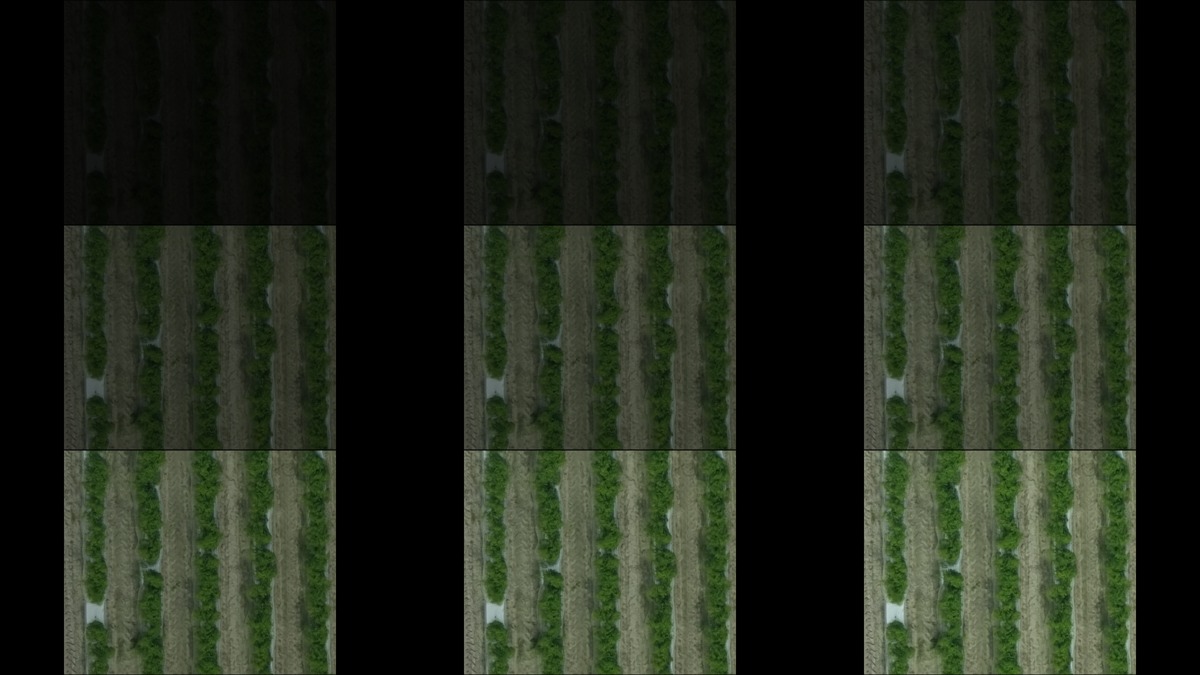

In [56]:
# Ok, that's a nice proof of concept. But it's a little tough to see. Lets instead change this to a three
# by three grid of values. First thing we should do is make our canvas, and we'll make it 3 times the
# width of our image and 3 times the height of our image - a nine image square
contact_sheet=PIL.Image.new(first_image.mode, (first_image.width*3,first_image.height*3))
# Now we want to iterate over our images and place them into this grid. Remember that in PIL we manage the
# location of where we refer to as an image in the upper right hand corner, so this will be 0,0. Lets use
# one variable for the X dimension, and one for the Y dimension.
x=0
y=0

# Now, lets iterate over our images. Except, we don't want to both with the first one, because it is
# just solid black. Instead we want to just deal with the images after the first one, and that should
# give us nine in total
for img in images[1:]:
    # Lets paste the current image into the contact sheet
    contact_sheet.paste(img, (x, y) )
    # Now we update our X position. If it is going to be the width of the image, then we set it to 0
    # and update Y as well to point to the next "line" of the contact sheet.
    if x+first_image.width == contact_sheet.width:
        x=0
        y=y+first_image.height
    else:
        x=x+first_image.width

# Now lets resize the contact sheet. We'll just make it half the size by dividing it by two. And, because
# the resize function needs to take round numbers, we need to convert our divisions from floating point
# numbers into integers using the int() function.
contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
# Now lets display that composite image
display(contact_sheet)